In [1]:
import numpy as np

import time
import torch
import torchvision

import matplotlib.pyplot as plt
import torch.nn.functional as F

/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Image Classification

## Introduction

We're beginning our AI journey today! First, we're going to go through some examples of how AI/deep learning is used by people today. I would like to note that even though we're 10 years into what's been called the deep learning revolution, it's still not as widely used as it could be (in my opinion).

## Applications

### Agricultural

John Deere, the tractor company, uses [deep learning](https://www.deere.com/en/news/all-news/see-spray-ultimate/) today! In fact, it uses object detection. One part of agriculture is the broad use of herbicide to kill weeds. The entire field is sprayed with it. John Deere developed the See & Spray system to reduce the amount of herbicide used. The system uses 36 cameras to identify weeds, which then become targets for herbicide spray. The cameras use object detection to differentiate weeds from the crop and to determine the location of the weeds. The system then uses that location to spray the weeds.

### Entertainment

We're all familiar with Netflix, Spotify, Pandora, etc. Streaming video and music services rely in part on deep learning to determine what shows, movies, and videos to recommend.

### Webpages

[Google has a method to speed up webpage loading.](https://blog.tensorflow.org/2021/05/speed-up-your-sites-with-web-page-prefetching-using-ml.html) To load a webpage, your browser sends a request to the server to download and display pictures on your browser. In areas with poor cellular or internet service, this can take a large amount of time. The method that Google recommends is to fetch the pictures that it thinks you're going to need ahead of time. In order to predict what pictures will be needed, you can use a machine learning model, which contains deep learning models.

### Automatic Captioning

Youtube uses [deep learning](https://ai.googleblog.com/2019/10/on-device-captioning-with-live-caption.html) to produce automatically produce captions for youtube videos.

### Automatic Speech Recognition

Digital assistants are becoming increasingly popular. Siri, OKGoogle, and Alexa are available on numerous devices. These systems use deep learning in several ways. Siri uses [deep learning](https://machinelearning.apple.com/research/hey-siri) to recognize its wake word "Hey Siri". Then it uses deep learning based ASR to create a transcription of your text in order to determine what you're asking Siri.

### Machine Translation



### Self-driving cars
### Robotics
### Object Detection

## Machine Learning Distilled

Machine learning can be an incredibly complicated software engineering endeavor, but it can be boiled down to a key points:
- data
- model
- training.

You have data that you want to make some sort of prediction or classification with. Maybe you have transaction data and you want to determine which are fraudulent. Maybe you have audio data and you want to output a text transcription. How do we make these predictions? We need a model that transforms the data somehow. Then, how do we pick which model to use? Typically, we choose a model that can be updated based feedback from the data. We call this model training.

So, the model takes in data and then updates the model based on the data.

Let's look at an example of this.
First, we'll create a model that has not been trained and show that it cannot recognize the input. Then we'll train it and show that it can now recognize inputs.
You don't need to understand the code, you just need to know that we are getting data, creating a model, and training that model.

In [2]:
class_list = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [3]:
normalize_ds = torchvision.datasets.CIFAR10(root='./data',
                                            train=True,
                                            download=True,
                                            transform=torchvision.transforms.ToTensor(),
                                            )
normalize_dl = torch.utils.data.DataLoader(normalize_ds,
                                           batch_size=len(normalize_ds),
                                           shuffle=True,
                                           num_workers=0)

Files already downloaded and verified


In [4]:
for data, _ in normalize_dl:
    mean = torch.mean(data, (0, 2, 3))
    std = torch.std(data, (0, 2, 3))

In [5]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize(mean=mean, std=std),
    ]
)

In [6]:
train_ds = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform)
test_ds = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform)

In [7]:
train_loader = torch.utils.data.DataLoader(train_ds,
                                          batch_size=len(train_ds),
                                          shuffle=True,
                                          num_workers=0,
                                          pin_memory=False)
test_loader = torch.utils.data.DataLoader(test_ds,
                                          batch_size=len(test_ds),
                                          shuffle=True,
                                          num_workers=0,
                                          pin_memory=False)

In [8]:
class LeNet(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=3,
                                     out_channels=6,
                                     kernel_size=5,
                                     padding=2)
        self.conv2 = torch.nn.Conv2d(in_channels=6,
                                     out_channels=16,
                                     kernel_size=5)
        self.pool = torch.nn.AvgPool2d(kernel_size=2,
                                       stride=2)
        self.fc1 = torch.nn.Linear(in_features=576,
                                   out_features=120)
        self.fc2 = torch.nn.Linear(in_features=120,
                                   out_features=84)
        self.fc3 = torch.nn.Linear(in_features=84,
                                   out_features=10)
        self.activation = torch.tanh
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.activation(x)
        x = self.pool(x)
        x = torch.flatten(x, start_dim=1)
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = self.fc3(x)
        x = self.activation(x)
        return x

In [9]:
model = LeNet()

In [10]:
def imshow(img, label=None, class_list=class_list):
    # Pytorch has images in Channel x height x width, this converts to h x w x c
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.4914, 0.4822, 0.4465])
    std = np.array([0.2470, 0.2435, 0.2616])
    # undo the normalization
    img = std * img + mean
    # ensure that array is in the proper range to show the image.
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if label is not None:
        # label is assumed to be a (1, ) tensor
        label = label.item()
        label = class_list[label]
        plt.title(label)
    plt.pause(0.001)

In [11]:
images, classes = next(iter(train_loader))

In [12]:
images.shape

torch.Size([50000, 3, 32, 32])

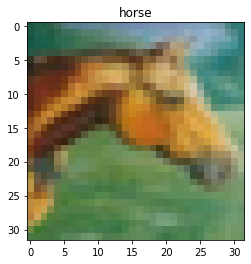

In [13]:
num = 0
imshow(images[num], classes[num])

In [14]:
def make_prediction(model, image, class_list=class_list):
    # If shape is not 
    image = image.unsqueeze(0)
    pred = model(image)
    pred = torch.argmax(pred)
    return class_list[pred]

In [15]:
make_prediction(model, images[num])

'deer'

We downloaded the training set, looked at an image, and found that our model makes incorrect predictions. We're going to change that by training.

In [40]:
def train(model, train_loader, criterion, opt, epochs=10):
    history = []
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    
    print("Epoch | Batch | Time(s) | Loss")
    print("------------------------------")
    
    step = 0
    
    for epoch in range(epochs):
        running_loss = 0.0
        t = time.time()
        
        for i, (inputs, label) in enumerate(train_loader, 0):
            inputs, label = inputs.to(device), label.to(device)
            
            opt.zero_grad(set_to_none=True)
            
            outputs = model(inputs)
            loss = criterion(outputs, label)
            
            loss.backward()
            opt.step()
            
            running_loss += loss.item()
            step += 1
            history.append((step, loss))
            
        t = time.time() - t
        print(f"{epoch + 1:5d} | {i:5d} | {int(t):8d} | {running_loss:.5f}")
        running_loss = 0
    
    return history

In [41]:
def evaluate(model, testloader):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, label in test_loader:
            inputs, label = inputs.to(device), label.to(device)
            outputs = model(inputs)
            
            _, predicted = torch.max(outputs.data, 1)
            total += label.size(0)
            correct += (predicted == label).sum().item()
            
    print(f'Accuracy of the network on 10000 test images: {100 * correct // total} %')
    return 100 * correct // total

In [36]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
opt = torch.optim.SGD(model.parameters(), lr=1e-1, momentum=0.9)

cuda:0


Let's evaluate the model before training

In [37]:
evaluate(model, test_loader)

Accuracy of the network on 10000 test images: 39 %


39

In [45]:
history = train(model, train_loader, criterion, opt, epochs=100)

Epoch | Batch | Time(s) | Loss
------------------------------
    1 |     0 |        8 | 1.52172
    2 |     0 |        4 | 1.52094
    3 |     0 |        3 | 1.52000
    4 |     0 |        3 | 1.51917
    5 |     0 |        3 | 1.51839
    6 |     0 |        3 | 1.51751
    7 |     0 |        3 | 1.51665
    8 |     0 |        3 | 1.51586
    9 |     0 |        3 | 1.51505
   10 |     0 |        3 | 1.51417
   11 |     0 |        3 | 1.51337
   12 |     0 |        3 | 1.51257
   13 |     0 |        3 | 1.51175
   14 |     0 |        3 | 1.51091
   15 |     0 |        3 | 1.51012
   16 |     0 |        3 | 1.50932
   17 |     0 |        3 | 1.50851
   18 |     0 |        3 | 1.50769
   19 |     0 |        3 | 1.50690
   20 |     0 |        4 | 1.50612
   21 |     0 |        3 | 1.50533
   22 |     0 |        4 | 1.50453
   23 |     0 |        3 | 1.50373
   24 |     0 |        3 | 1.50295
   25 |     0 |        4 | 1.50218
   26 |     0 |        3 | 1.50140
   27 |     0 |        3 | 1

We'll look at our training step vs loss curve and we'll evaluate the model:

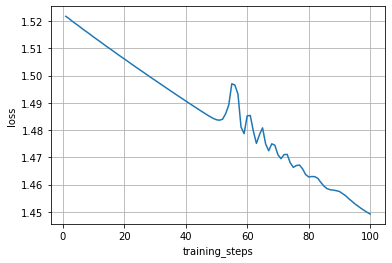

In [46]:
training_steps = np.array([step for step, _ in history])
loss = np.array([loss.item() for _, loss in history])

fig, ax = plt.subplots()
ax.plot(training_steps, loss)

ax.set(xlabel='training_steps', ylabel='loss')
ax.grid()
plt.show()

In [50]:
evaluate(model, test_loader)

Accuracy of the network on 10000 test images: 55 %


55

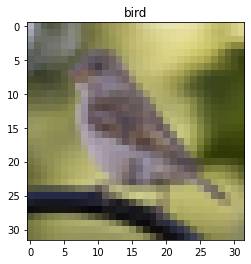

In [51]:
num = 9
imshow(images[num], classes[num])

In [52]:
print(make_prediction(model, images[9].to(device)), class_list[classes[num]])

bird bird


Great! Now we're going to go into more detail on what we did!
We're going to go into detail on the following datasets:
- MNIST
- E MNIST
- CIFAR10
- Fashion MNIST
- CIFAR100
- ImageNet
Then we'll go into detail about model architectures:
- LeNet
- ResNet
- Darknet
- CSPDarknet
Then we'll talk about how we actually train the models!
If you noticed about in the code above, we wrote `torch.optim.SGD`. What the SGD here stands for is **stochastic gradient descent**. It may be an intimidating name, but we'll break it down in order to understand how it works. Almost all deep learning models are trained with some variant of this.

We're going to reproduce one of the seminal works in deep learning: [Backpropagation Applied to Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf).
We'll go through a handwritten digit dataset, the model architecutre the paper used, and the SGD training algorithm above!

We'll do all of this in Pytorch!